# K_Means Clustering
- Distance based bir model olduğu için scaling yapılması gerekebilir. Ancak datalar birbirine yakınsa yapmadan da denenebilir. Her zaman scaling yapılacak diye birşey yok. Bazı durumlarda scaling score'da düşmeye sebep verebilir. Bu yüzden hem scaling ile hem scaling yapmadan score alayı deneyebilirsiniz.

- Parameters:
    - **init :** "kmeans++" daha çok tercih edilir.
    - **n-init :** default değeri 10'dur. 10 kere init yapar. Centroidlerin konumundan emin olur. En iyi sonucu seçer.
    - **n-clusters :** data'nın kaç tane kümeden oluştuğunu belirtmek için kullanılır.




## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("iris.csv")
df.head()

# Unsupervised Learning'de label olmaz. Bu data içinde de labelımız yok.
# çiçekleri taç ve çanak yaprak ölçülerine göre kümelere ayırmaya çalışacağız.

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


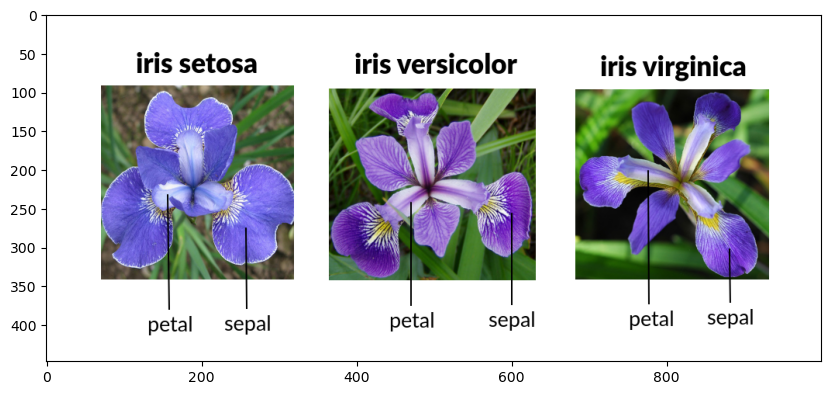

In [6]:
import matplotlib.image as mpimg
image = mpimg.imread("iris.png")
plt.imshow(image);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


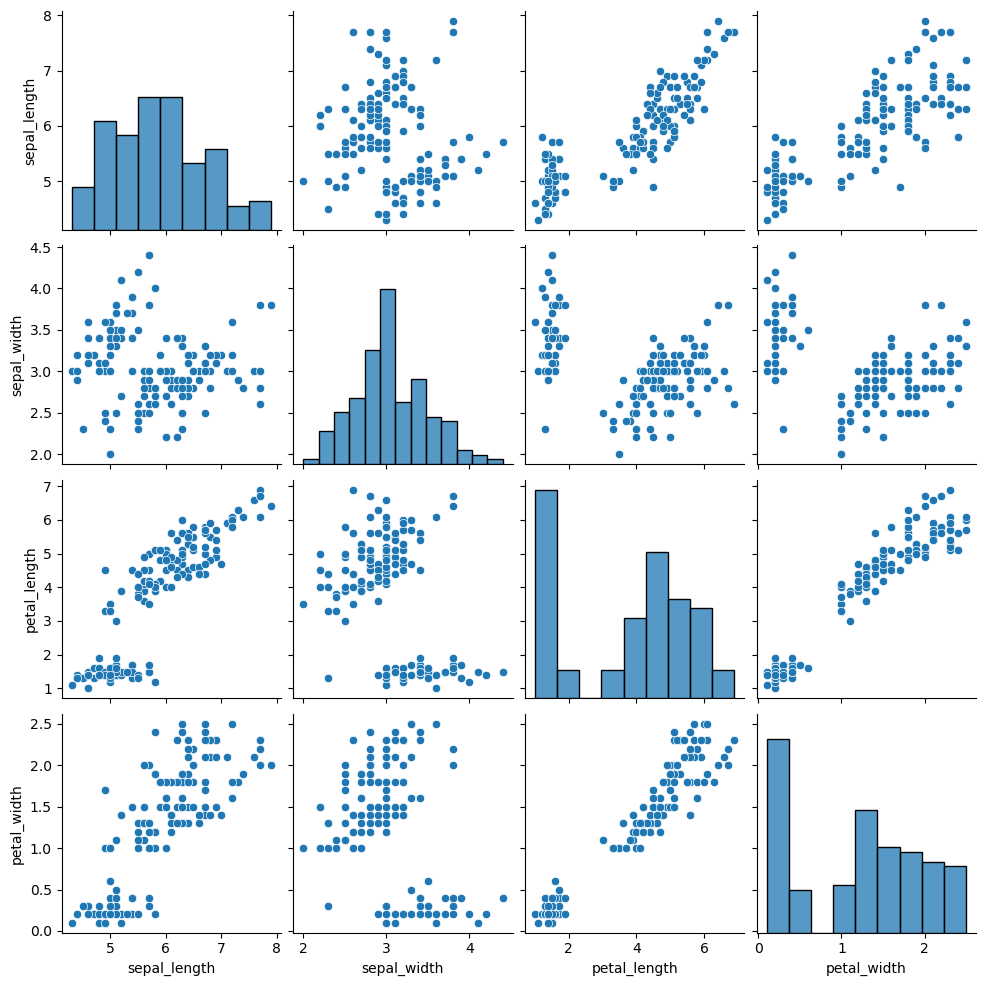

In [10]:
sns.pairplot(df);
# Buradaki pairplot'a bakarak datasetini en azından 2'ye ayırabileceğimizi görüyoruz. 

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

## 1. Without Scaling
Burada feature'ların min-max aralıkları birbirine yakın olduğu için önce scaling yapmadan denemeye karar verdim.

## K_Means Clustering

In [11]:
X = df.copy()

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
X.shape

(150, 4)

In [15]:
from sklearn.cluster import KMeans

In [16]:
k_means_model = KMeans(random_state=42)

In [18]:
k_means_model.fit_predict(X)
# Burada  biz fit_predict(X) kullandık. Ancak sadece fit() de kullanılabilirdi.
# Bizim yaklaşımımız predict'leri de görmek olduğu için fit_predict() kullanıyoruz.

array([0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 4, 0,
       0, 4, 0, 4, 0, 4, 2, 2, 2, 6, 2, 6, 2, 3, 2, 6, 3, 6, 6, 2, 6, 2,
       6, 6, 2, 6, 7, 6, 7, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 7, 6, 2, 2, 2,
       6, 6, 6, 2, 6, 3, 6, 6, 6, 2, 3, 6, 1, 7, 1, 1, 1, 5, 6, 5, 1, 5,
       1, 7, 1, 7, 7, 1, 1, 5, 5, 7, 1, 7, 5, 7, 1, 5, 7, 7, 1, 1, 5, 5,
       1, 7, 7, 5, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 7])

In [19]:
k_means_model.labels_
# Eğer sadece fit() ile eğittiyseniz "".labels_" kullanarak labelları görebilirsiniz.

array([0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 4, 0,
       0, 4, 0, 4, 0, 4, 2, 2, 2, 6, 2, 6, 2, 3, 2, 6, 3, 6, 6, 2, 6, 2,
       6, 6, 2, 6, 7, 6, 7, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 7, 6, 2, 2, 2,
       6, 6, 6, 2, 6, 3, 6, 6, 6, 2, 3, 6, 1, 7, 1, 1, 1, 5, 6, 5, 1, 5,
       1, 7, 1, 7, 7, 1, 1, 5, 5, 7, 1, 7, 5, 7, 1, 5, 7, 7, 1, 1, 5, 5,
       1, 7, 7, 5, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 7])

In [20]:
X["Clusters"] = k_means_model.labels_

In [21]:
X

,sepal_length,sepal_width,petal_length,petal_width,Clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,4
2,4.7,3.2,1.3,0.2,4
3,4.6,3.1,1.5,0.2,4
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,7
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


## Hopkins test
- Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability and a score tending to 0 express a high cluster tendency.
- Hopkins testi sonucu çıkan değer bizim datamızın k-means için elverişliliğini gösterir.
- Değer ne kadar küçükse data k-means için o kadar elverişlidir.

In [23]:
X = X.drop(columns="Clusters")

In [24]:
from pyclustertend import hopkins

In [25]:
X.shape

(150, 4)

In [32]:
hopkins(X, X.shape[0])
# Burada hem dataframe'i veriyoruz hem de örneklem sayısını veriyoruz.
# Score'umuz 0' yakın çıkmış. Bu datanın k-means için elverişli olduğunu görüyoruz.
# Zaten yukarıdaki pairplot analizimizde de en az 2 küme görmüştük.

0.16452907134168704

# Choosing The Optimal Number of Clusters
- "n_clusters" parametresine en uygun değeri bulmak için birkaç method var. Burada bunlara bakacağız.

## Elbow metod

In [35]:
ssd = [] # sum squared distance

K = range(2, 10) # en az 2 küme olmalı. max olarak da 9 a kadar yazdık. score'lara göre değiştirebiliriz.

for k in K:
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_) # inertia_ : kümeyi oluşturan herbir noktanın kümenine merkezine(centroid) uzaklıklarının toplamı

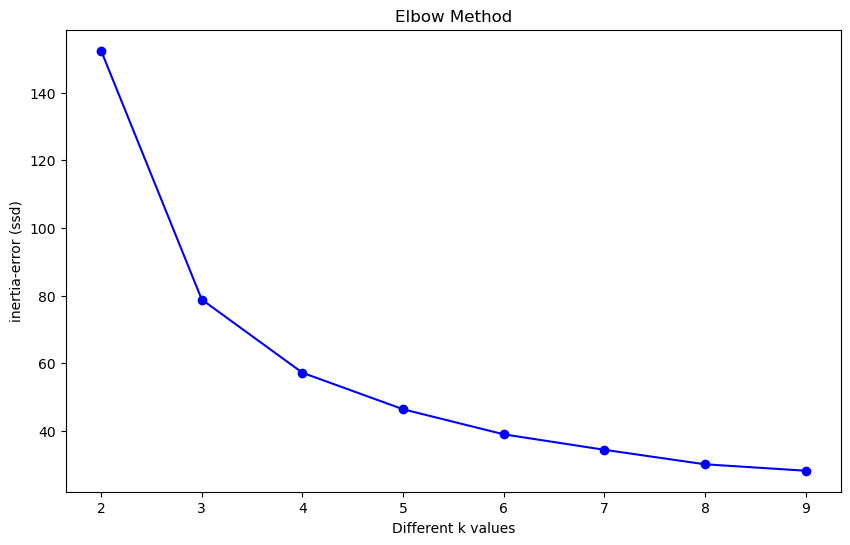

In [38]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)")
plt.title("Elbow Method");

In [39]:
# Burada grafiğe baktığımızda k değerini 3 veya 4 seçmekte kararsız kalıyoruz.
# Doğrunun elbow yaptığı nokte 3 ancak 4 de denenebilir.
# Emin olmak için yellowbrick'e bakacağız.

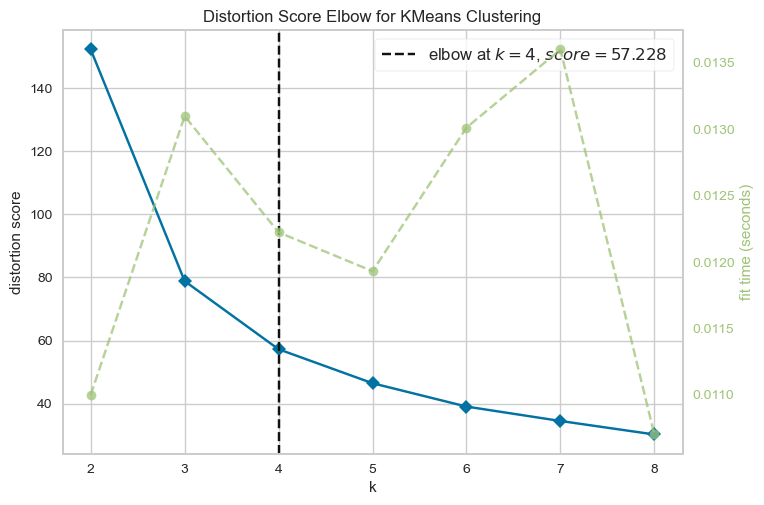

In [44]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k = (2, 9))

visualizer.fit(X)
visualizer.show();

# Burada score bize data noktalarının küme merkezine uzaklıklarının toplamını veriyor.
# Yellowbrick bize k = 4 öneriyor.
# Elbow = 3 demişti. Şu an kararsızlık devam ediyor... Silhoutte analizi ile son kararımı vereceğim.

## Silhouette analysis
- Optimal k değerini bulmak için kullanılan internal bir yöntemdir. Ayrıca External yöntemler de vardır.
- Silhoutte Analysis ile küme içi ve kümeler arası uzaklık kullanılarak silhoutte score'u üretilir.
- Bu score 1'e ne kadar yakın olursa o kadar iyidir.

In [45]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score(X, k_means_model.labels_)
# Burada modelimizi default değeri olan k=8 ile train ettiğimiz için score düşük çıktı. 
# Farklı k değerleri ile bu score'un değişimini görelim.

0.3574536925852726

In [50]:
range_n_clusters = range(2, 9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    model = KMeans(n_clusters = num_clusters, random_state = 42)
    model.fit(X)
    cluster_labels = model.labels_
    # silhouette score
    silhoutte_avg = silhouette_score(X, cluster_labels)
    print(f"n_clusters : {num_clusters} and silhoutte score :{round(silhoutte_avg, 2)}")

n_clusters : 2 and silhoutte score :0.68
n_clusters : 3 and silhoutte score :0.55
n_clusters : 4 and silhoutte score :0.5
n_clusters : 5 and silhoutte score :0.49
n_clusters : 6 and silhoutte score :0.36
n_clusters : 7 and silhoutte score :0.35
n_clusters : 8 and silhoutte score :0.36


In [51]:
# Burada biz n_cluster için 3 ve 4 arasında kalmıştık. 
# Silhoutte score sonrası n_cluster olarak 3 seçmeye karar verdik.

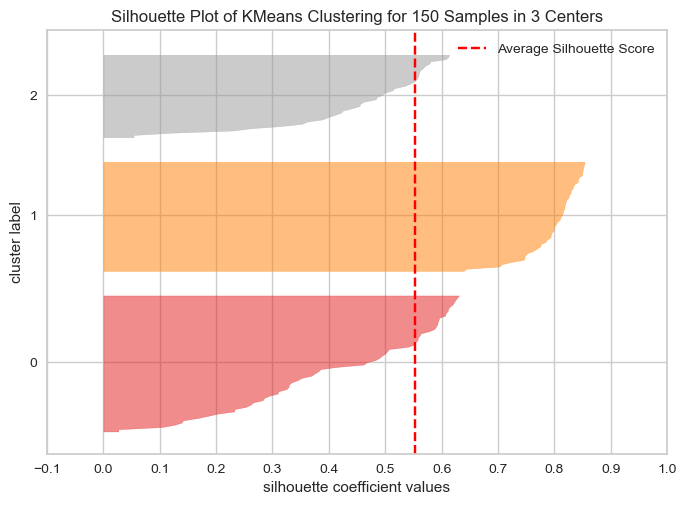

In [52]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters = 3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)
visualizer.poof();

## Building the model based on the optimal number of clusters

In [53]:
model = KMeans(n_clusters=3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [56]:
clusters = model.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [57]:
X["predicted_clusters"] = clusters

In [58]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [59]:
# cluster tahminlerimizi dataframe' e ekledik.
# Bizim elimizde labellar vardı ancak başka bir dosyada idi. Kontrol amaçlı import edip karşılaştıralım.

In [61]:
labels = pd.read_csv("label.csv")

In [62]:
X["labels"] = labels

In [65]:
X.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
39,5.1,3.4,1.5,0.2,1,setosa
68,6.2,2.2,4.5,1.5,0,versicolor
115,6.4,3.2,5.3,2.3,2,virginica
5,5.4,3.9,1.7,0.4,1,setosa
55,5.7,2.8,4.5,1.3,0,versicolor
126,6.2,2.8,4.8,1.8,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
8,4.4,2.9,1.4,0.2,1,setosa
90,5.5,2.6,4.4,1.2,0,versicolor
6,4.6,3.4,1.4,0.3,1,setosa


In [76]:
# Crosstab ile tahminlerimizin ne kadarı doğru ne kadarı yanlış bakalım.
ct = pd.crosstab(X["predicted_clusters"], X["labels"])
ct


# Burada 0 numaralı cluster'da için 48'imi versicolor'dan 14'ünü virginica'dan almış. 
# Muhtemelen 0 numaralı cluster "versicolor" ı gösteriyor ancak 14 tane da hata yapmış.

# 1 numaralı cluster içn 50 tane data'ya cluster demiş. Ve başka da bir şey dememiş.
# Buradan 1 numaralı clusterin "setosa" olduğunu ve tam performans ile ayrıldığını görüyoruz.
# Muhtemelen en başta pairplot'a baktığımızda data dağılımından açık bir şekilde ayrılan bu küme idi.

# Yine 2 numaralı cluster için 36 adet virginica'dan, 2 adet de versicolor'dan almış
# 2 numaralı cluster'ın "virginica" olduğunu ancak 2 adet hata yapıldığını söyleyebiliriz.

# Elimizde labellar olan bir durumda bu tahminleri iyileştirmenin yollarını arayacağız.


labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Adjust Rand Index Score
- External yöntem olarak ARI score'a bakıyoruz.
- Eğer elimizde labellar varsa genelde ARI Score'a bakarız.
-    Similarity score between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.

In [67]:
from sklearn.metrics import adjusted_rand_score

In [74]:
adjusted_rand_score(X["labels"], X["predicted_clusters"])
# ARI score'u 1'e ne kadar yakınsa modelimiz o kadar iyi demektir.

0.7302382722834697

## Remodeling according to discriminating features

In [77]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [78]:
X.iloc[:, :-1].head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [81]:
clus_pred = X.iloc[:, :-1].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,5.901613,5.006,6.850000
sepal_width,2.748387,3.428,3.073684
petal_length,4.393548,1.462,5.742105
petal_width,1.433871,0.246,2.071053


<AxesSubplot:>

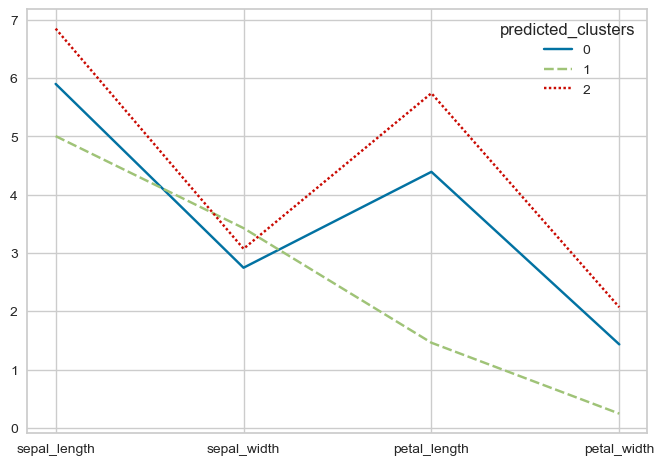

In [82]:
sns.lineplot(data = clus_pred)

In [84]:
# Bu grafiğe baktığımız zaman "sepal_width" isimli feature'un clustering yapmaya uygun olmadığını görebiliyoruz.
# EN iyi ayrımı yapan feature ise "petal_length".

# Petal_length ve petal_width ile clustering yapsam daha iyi olur gibi. Bir bakalım.

In [86]:
X2 = X.loc[:, ["petal_length", "petal_width"]]
X2.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Hopkins test

In [87]:
hopkins(X2, X2.shape[0])

0.10910260735952486

In [90]:
# İlk başta tüm feature'lar ile yaptığımız hopkins testi sonrası score 0.16 çıkmıştı.
# Burada 0.1 çıktı. Bu 2 feature ile daha iyi clustering yapabilirim anlamına geliyor. DEneyelim.

## Elbow metod

In [91]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

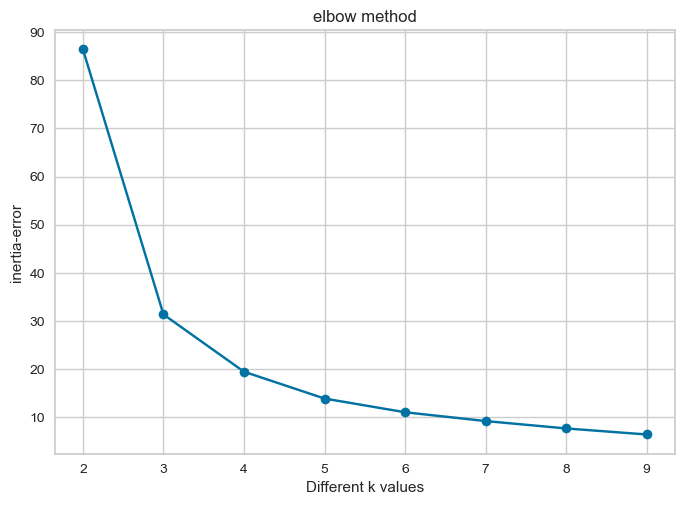

In [93]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

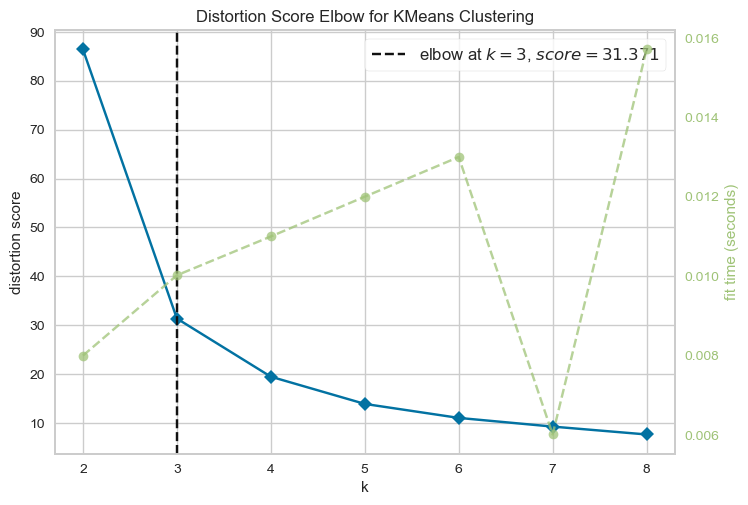

In [94]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [ ]:
# Burada bu sefer hem elbow method hem de yellowbrick optimal k = 3 buldu. 
# Yine de silhoutte score'lara bakalım.

## Silhouette analysis

In [95]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7653904101383076
For n_clusters=3, the silhouette score is 0.6604800085022658
For n_clusters=4, the silhouette score is 0.6127580795614039
For n_clusters=5, the silhouette score is 0.588373271407563
For n_clusters=6, the silhouette score is 0.5762928191225791
For n_clusters=7, the silhouette score is 0.5640984344798261
For n_clusters=8, the silhouette score is 0.5902255629729695


In [97]:
# Burada score'a göre yine k=3 seçmeliyiz. 
# Buradki score'larımız tüm feature'lar ile aldığımız score'lara göre daha yüksek.

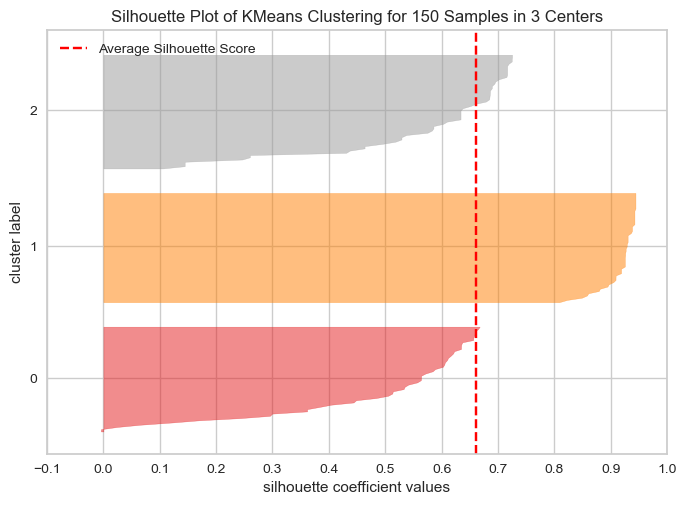

In [98]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

In [99]:
final_model = KMeans(n_clusters=3, random_state=42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
X2["labels"] = labels

In [102]:
X2["predicted_clusters"] = final_model.labels_

In [103]:
X2.head()

,petal_length,petal_width,labels,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1


## Adjust Rand Index Score

In [104]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)
# Burada ARI score'umuz daha öncekine göre daha yüksek çıktı.

0.8856970310281228

## Compare results

In [105]:
pd.crosstab(X2["predicted_clusters"], X2["labels"])

# Yukarıda 4 feature ile clustering yaptığımda toplam hata sayısı 16 idi. Şu anda hata sayımız 6'ya düştü.
# Feature sayısını azaltmak model'e iyi geldi.

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


## Prediction cluster of new data

In [106]:
new_data = [[1.7, 0.2]]
# Burada predict için değer verirken dataframe olarak vermek önemli yoksa hata alırsınız.

In [108]:
final_model.predict(new_data)
# modellimiz girilen değerler için clustering sonrası "setosa" kümesine ait olduğunu söyledi.

array([1])

In [110]:
# Silhoutte ve ARI yapılan clustering'in kalitesini ölçer.
# Silhoutte internal, ARI external bir methoddur.
# Eğer labellara ulaşabiliyorsak ARI kullanırız.